В данном проекте будет изучена статистика заведённых мною статей в русскоязычном сегменте Википедии.

### Подготовка датасета

На этом этапе мы подготовим данные для удобства формирования последующих результатов. Для этого нужно будет переименовать названия колонок, удалить колонки с отсутствующими значениям, заполним значения текущего размера статей в кортежах, где размер не указан, а также переведём колонку с датой создания статьи к нужному типу. 

In [69]:
#импортируем библиотеки и датасет

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

wiki = pd.read_csv('wikipedia2021.csv')
wiki.head()

,Пространство имён,Заголовок страницы,Дата,Исходный размер,Текущий размер
0,0,"Бркляча, Марко",2021-10-20 06:24,3077,5722.0
1,0,"Диамбу, Мамади",2021-10-13 05:50,6413,6469.0
2,0,"Конате, Карим",2021-10-11 05:49,4343,5438.0
3,0,"Бесио, Алессио",2021-10-08 06:28,3351,5682.0
4,0,"Макуана, Бени",2021-10-04 06:47,4959,7288.0


In [70]:
#переименовываем колонки

wiki.rename(columns={'Пространство имён':'space_name', 
                     "Заголовок страницы" : 'title', 
                     'Дата':'date', 
                     'Исходный размер':'first_volume',
                     'Текущий размер':'last_volume'}, inplace=True)
wiki.head()

,space_name,Заголовок страницы,date,first_volume,last_volume
0,0,"Бркляча, Марко",2021-10-20 06:24,3077,5722.0
1,0,"Диамбу, Мамади",2021-10-13 05:50,6413,6469.0
2,0,"Конате, Карим",2021-10-11 05:49,4343,5438.0
3,0,"Бесио, Алессио",2021-10-08 06:28,3351,5682.0
4,0,"Макуана, Бени",2021-10-04 06:47,4959,7288.0


In [71]:
wiki.space_name.value_counts(dropna=False)

0    1000
Name: space_name, dtype: int64

In [72]:
wiki.drop('space_name', axis=1, inplace=True)

In [73]:
mean_last_volume = wiki.last_volume.mean()

In [74]:
#заполним отсутствующие значения средним по столбцу

wiki.last_volume.fillna(mean_last_volume, inplace=True)

In [75]:
#переведём временной столбец в тип datetime64

wiki['date'] = pd.to_datetime(wiki.date)
wiki['year'] = wiki.date.dt.year
wiki['month'] = wiki.date.dt.month

### Статьи по времени создания

В данном разделе мы посмотрим, как создавались статьи в зависимости от временных периодов, построим гистограммы распределения статей в зависимости от годов и месяцев.

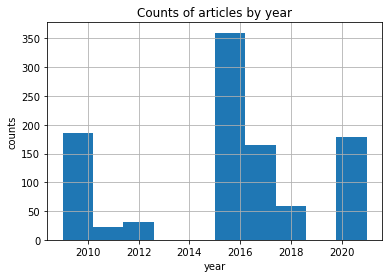

In [76]:
#строим гистограмму распреления созданных статей по годам

wiki.hist('year')
plt.xlabel('year')
plt.ylabel('counts')
plt.title('Counts of articles by year')
plt.show()

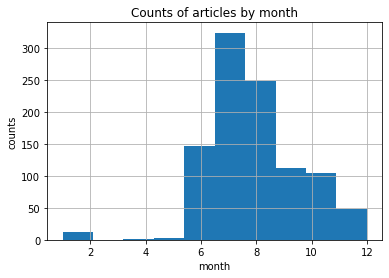

In [77]:
wiki.hist('month')
plt.xlabel('month')
plt.ylabel('counts')
plt.title('Counts of articles by month')
plt.show()

Из графиков видно, что страницы Википедии заводились мной **циклически**, в наиболее удобные периоды жизни с последующим западением мотивации. Если отталкиваться от месячного распределения, видно, что работа с Википедией синхронизированно начинается с **началом лета**. Пик по количеству статей приходится на **июль**. К концу года интенсивность работы также падет. 

### Описательная статистика объёма статей

В данном разделе представлены ключевые показатели объёма статей. В частности, можно будет посмотреть на средние значения первичного и текущего объёма страниц, посмотреть на их средние значения, сгруппированные по годам создания, увидеть графики распределения объёмов статей в зависимости от времени, а также непосредственно в 2021 году.

Также будут выведены наибольшие и наименьшие статьи по исходному и текущему объёмам.

In [78]:
#среднее значение исходных размеров созданных статей

round(wiki.first_volume.mean(), 2)

4230.37

In [79]:
#среднее значение текущих размеров созданных статей

round(wiki.last_volume.mean(),2)

7565.51

In [80]:
#средние объёмы исходных сохранений в зависимости от года публикации

wiki.groupby('year')['first_volume'].agg(np.average)

year
2009    3998.602273
2010    6841.795918
2011    7686.590909
2012    8066.483871
2016    3820.238889
2017    3282.420732
2018    3426.017241
2020    3085.138889
2021    4246.607477
Name: first_volume, dtype: float64

In [81]:
#средние объёмы текущих сохранений в зависимости от года публикации

wiki.groupby('year')['last_volume'].agg(np.average)

year
2009    10078.477273
2010    12584.122675
2011    14837.227273
2012     9941.096774
2016     6637.812515
2017     6590.201220
2018     6251.568966
2020     5517.986111
2021     5424.962617
Name: last_volume, dtype: float64

In [82]:
wiki.first_volume.value_counts(bins=10)

(2562.5, 4718.0]      545
(4718.0, 6873.5]      227
(385.444, 2562.5]     143
(6873.5, 9029.0]       51
(9029.0, 11184.5]      24
(13340.0, 15495.5]      5
(11184.5, 13340.0]      3
(19806.5, 21962.0]      2
(15495.5, 17651.0]      0
(17651.0, 19806.5]      0
Name: first_volume, dtype: int64

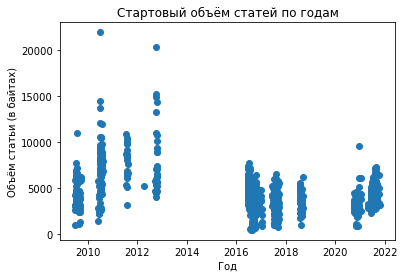

In [83]:
#строим точечный график с изображением стартового объёма статей по годам

plt.scatter(x= wiki.date, y=wiki.first_volume)
plt.xlabel('Год')
plt.ylabel('Объём статьи (в байтах)')
plt.title('Стартовый объём статей по годам')
plt.show()

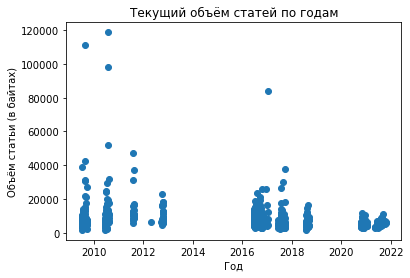

In [102]:
#строим точечный график с изображением текущего объёма статей по годам

plt.scatter(x= wiki.date, y=wiki.last_volume)
plt.xlabel('Год')
plt.ylabel('Объём статьи (в байтах)')
plt.title('Текущий объём статей по годам')
plt.show()

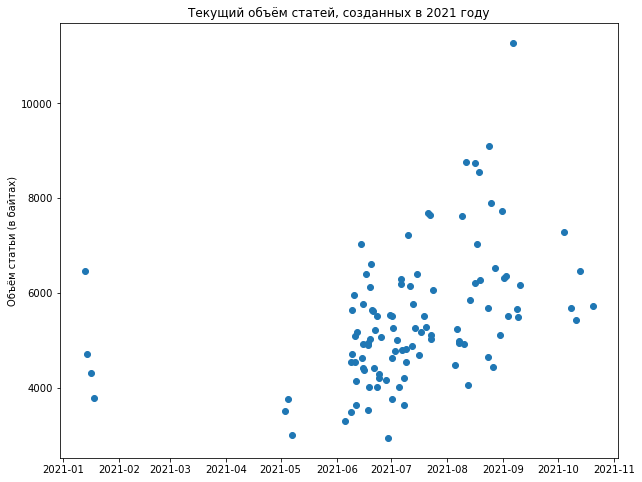

In [120]:
#распределение текущего объёма статей согласно дате их создания

plt.figure(figsize=(10,8))
plt.scatter(x= wiki[wiki.year == 2021]['date'], y= wiki[wiki.year == 2021]['last_volume'])
plt.ylabel('Объём статьи (в байтах)')
plt.title('Текущий объём статей, созданных в 2021 году')
plt.show()

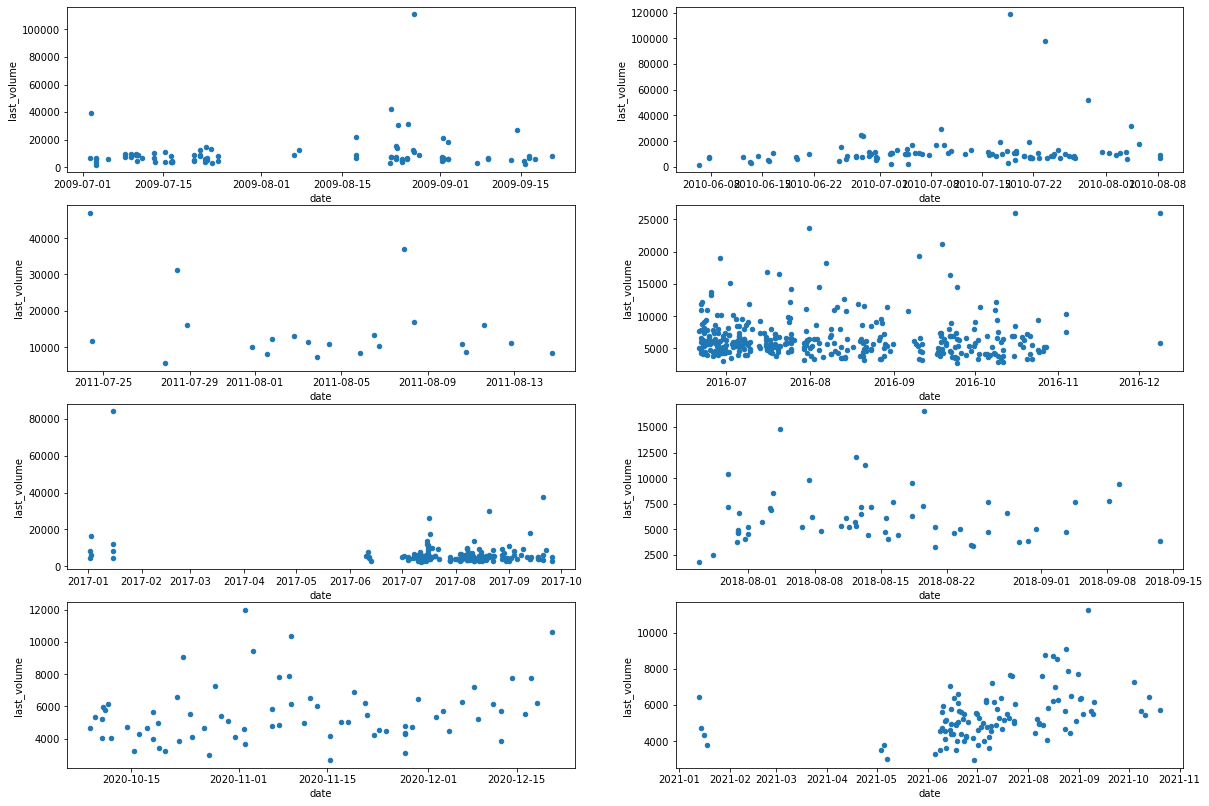

In [141]:
#распределение текущего объёма статей по годам их создания

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20,14))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 = ax.flatten()
wiki[wiki.year == 2009].plot('date', 'last_volume', ax=ax1, kind='scatter')
wiki[wiki.year == 2010].plot('date', 'last_volume', ax=ax2, kind='scatter')
wiki[wiki.year == 2011].plot('date', 'last_volume', ax=ax3, kind='scatter')
wiki[wiki.year == 2016].plot('date', 'last_volume', ax=ax4, kind='scatter')
wiki[wiki.year == 2017].plot('date', 'last_volume', ax=ax5, kind='scatter')
wiki[wiki.year == 2018].plot('date', 'last_volume', ax=ax6, kind='scatter')
wiki[wiki.year == 2020].plot('date', 'last_volume', ax=ax7, kind='scatter')
wiki[wiki.year == 2021].plot('date', 'last_volume', ax=ax8, kind='scatter')
plt.show()

In [137]:
#Cамые большие статьи, которые я заводил. 
#Википедия даёт данные на первое сохранение, поэтому статистика не является валидной - 
#первое сохранение не явялется завершением работы над статьёйи

wiki.sort_values('first_volume', ascending=False).head(5)

,Заголовок страницы,date,first_volume,last_volume,year,month
892,"Байн, Уве",2010-06-28 11:06:00,21962,24539.0,2010,6
781,"Бельтран, Карлос",2012-10-06 14:18:00,20383,23124.0,2012,10
777,"Беркман, Лэнс",2012-10-09 19:28:00,15210,18506.0,2012,10
786,"Карпентер, Крис",2012-10-01 11:32:00,14867,16482.0,2012,10
871,"Диц, Бернард",2010-07-05 10:20:00,14481,16865.0,2010,7


In [138]:
#доказательство того, что первое сохранение не является показателем

wiki.sort_values('first_volume', ascending=True).head(5)

,Заголовок страницы,date,first_volume,last_volume,year,month
540,"Батютин, Андрей Андреевич",2016-08-14 14:20:00,407,4830.0,2016,8
524,"Сен-Луи, Дилан",2016-08-21 16:53:00,410,6195.0,2016,8
529,"Ковалёв, Никита Александрович",2016-08-20 20:19:00,450,3258.0,2016,8
513,"Уинкс, Гарри",2016-08-27 15:02:00,462,8937.0,2016,8
572,"Обляков, Иван Сергеевич",2016-07-31 15:28:00,508,23727.0,2016,7


In [139]:
#самые крупные статьи из заведённых мной

wiki.sort_values('last_volume', ascending=False).head(10)

,Заголовок страницы,date,first_volume,last_volume,year,month
851,"Гётце, Марио",2010-07-18 21:07:00,5620,118660.0,2010,7
934,"Мюллер, Томас",2009-08-27 10:02:00,2600,111054.0,2009,8
836,"Рангник, Ральф",2010-07-23 14:47:00,8314,97885.0,2010,7
393,"Александер-Арнольд, Трент",2017-01-15 15:48:00,1991,84019.0,2017,1
824,"Ройс, Марко",2010-07-29 12:59:00,4289,52164.0,2010,7
813,"Перишич, Иван",2011-07-24 09:46:00,10857,46951.0,2011,7
951,"Таски, Сердар",2009-08-23 10:24:00,4427,42450.0,2009,8
998,"Боатенг, Жером",2009-07-02 09:42:00,5867,38986.0,2009,7
241,"Холанн, Эрлинг",2017-09-20 15:47:00,5478,37674.0,2017,9
798,"Тер Стеген, Марк-Андре",2011-08-07 21:31:00,6615,37094.0,2011,8


In [140]:
#самые короткие статьи из заведённых мною

wiki.sort_values('last_volume', ascending=True).head(10)

,Заголовок страницы,date,first_volume,last_volume,year,month
997,Влахина,2009-07-03 06:31:00,931,1737.0,2009,7
911,Хасселькопф,2010-06-06 08:42:00,1427,1744.0,2010,6
236,Давинкопф,2018-07-26 18:34:00,1724,1831.0,2018,7
916,"Бёртон, Роберт (политик)",2009-09-15 18:35:00,1265,2297.0,2009,9
872,The Wolves Go Hunt Their Prey,2010-07-04 20:39:00,2478,2449.0,2010,7
365,"Ван де Берг, Тим",2017-07-12 08:34:00,3098,2522.0,2017,7
235,Парзайершпитце,2018-07-28 05:34:00,2283,2527.0,2018,7
960,"Хорниг, Хайнц",2009-07-23 08:55:00,3184,2636.0,2009,7
880,Set Sail to Mystery,2010-07-02 13:25:00,2599,2652.0,2010,7
136,"Жуан Виктор (футболист, 2002)",2020-11-15 09:22:00,2599,2659.0,2020,11


Первичные и текущие объёмы созданных статей не обладают валидностью в должной мере. Первичные учитывают лишь начальное сохранение, что с учётом необходимости сохраняться как можно чаще, дабы не допустить потерю информации, не обладает необходимыми свойствами для оценки вклада участника в развитие Википедии. 

Текущие объёмы созданных статей также не могут говорить о вкладе пользователя - после его действий без требуемых уровней защиты Википедию может править любой. С другой стороны, конечный показатель чуть более информативен: он показывает приобретённые знания портала, интерес статьи для автора или иных пользователей.

Показатели среднего объёма статей сокращались с каждым годом. Объяснить это можно двумя фактами:

- сократилось количество потраченного времени на создание статей (~уменьшилось их качество);
- тема статей сконцентрировалась исключительно на юных футболистах, которые только начали собственную карьеру и биография которых не обладает достаточными фактами и достижениями.

Наибольший объём статей, которые были заведены мною, приходится на двух чемпионов мира - немцев **Марио Гётце** и **Томаса Мюллера**. Оба имеют текущий объём более **100000 байт**. Худшие показатели у гор **Влахина**, **Хасселькопф** и **Давинкопф**, которые представляют из себя краткие заметки с основными географическими показателями. 

Во всех графиках заметны выбросы, т.е. в каждом из годов создания появлялись статьи, которые могут оказаться крупными в рамках проекта. Поскольку большая часть страниц - это биографии футболистов, можно ожидать, что величина статьи будет зависеть от его карьеры. С другой стороны, начиная **с 2018 года**, не появилось ни одной статьи, которая могла бы дотянуть до 20000 байт.

Есть мнение, что текущий объём - не значит конечный.
Однако ныне его картина такова.